# DigitalVidya

In [16]:
import os
import numpy as np
import pandas as pd

In [19]:
# load dataset
file_path = os.path.join(os.path.abspath('..'), 'Datasets', 'voice.csv')
voice_df = pd.read_csv(file_path)
voice_df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [1]:
# 1. Load the "voice.csv" dataset and perform feature extraction by using "label" as target column
import pandas as pd
import numpy as np
from sklearn import preprocessing, neighbors
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
# Reading and uploading the file
df = pd.read_csv('voice.csv')
df.head(5)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [13]:
# Name of the columns
col_names = list(df.columns.values)
print(col_names)
print (type(df.columns.values))

['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label']
<class 'numpy.ndarray'>


In [14]:
# import the classifier
from sklearn.ensemble import ExtraTreesClassifier

# create an instance
tree_clf = ExtraTreesClassifier(n_estimators=100)

y = df['label'].tolist()

# remove target column from the df
df_features = df.drop('label', axis=1)

# store features in X array
X = df_features.values

# check top 2 values
X[:2]

tree_clf.fit(X, y)
tree_clf.feature_importances_

array([0.02246706, 0.08608915, 0.02198691, 0.13694906, 0.02146489,
       0.20068279, 0.01756978, 0.01085814, 0.05725472, 0.03054651,
       0.02776482, 0.0217073 , 0.25511959, 0.01288111, 0.0114719 ,
       0.01439672, 0.01196607, 0.01403071, 0.01495944, 0.00983335])

In [15]:
from sklearn.feature_selection import SelectFromModel

model = SelectFromModel(tree_clf, prefit=True)
X_updated = model.transform(X)
print('Total features count', np.array(X).shape[1])
print('Selected features', np.array(X_updated).shape[1])

Total features count 20
Selected features 5


In [16]:
# 2. Split the training and testing data
#Lets use logistic Regression:
from sklearn.model_selection import train_test_split
#Producing X and y
X = np.array(df.drop(['label'], 1))
y = np.array(df['label'])

#Dividing the data randomly into training and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [17]:
# 3. Build a Logistic Regression classifier to detect the target

model=LogisticRegression(solver='liblinear')
model.fit(X_train,y_train)

print('Accuracy1 :',model.score(X_train,y_train))
print('Accuracy2 :',model.score(X_test,y_test))

Accuracy1 : 0.9108129439621152
Accuracy2 : 0.9085173501577287


Feature ranking:
feature 12 : meanfun (0.255120)
feature 5 : IQR (0.200683)
feature 3 : Q25 (0.136949)
feature 1 : sd (0.086089)
feature 8 : sp.ent (0.057255)
feature 9 : sfm (0.030547)
feature 10 : mode (0.027765)
feature 0 : meanfreq (0.022467)
feature 2 : median (0.021987)
feature 11 : centroid (0.021707)
feature 4 : Q75 (0.021465)
feature 6 : skew (0.017570)
feature 18 : dfrange (0.014959)
feature 15 : meandom (0.014397)
feature 17 : maxdom (0.014031)
feature 13 : minfun (0.012881)
feature 16 : mindom (0.011966)
feature 14 : maxfun (0.011472)
feature 7 : kurt (0.010858)
feature 19 : modindx (0.009833)


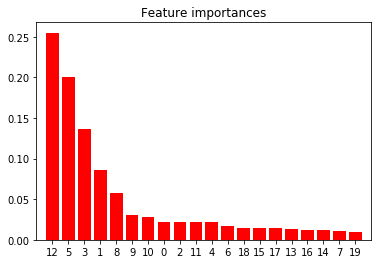

In [18]:
# 4. Check performances by using different number of features. Find the best set of features
import operator
importances = tree_clf.feature_importances_
feature_names = df_features.columns.tolist()

feature_imp_dict = dict(zip(feature_names, importances))
sorted_features = sorted(feature_imp_dict.items(), key=operator.itemgetter(1), reverse=True)

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("feature %d : %s (%f)" % (indices[f], sorted_features[f][0], sorted_features[f][1]))

# Plot the feature importances of the forest
plt.figure(0)
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [19]:
# 5. Build a KNN classifier to detect the label
#KNN Classifier
#Producing X and y
X = np.array(df.drop(['label'], 1))
y = np.array(df['label'])

#Dividing the data randomly into training and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model = neighbors.KNeighborsClassifier()
model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)
print('Accuracy='+str(accuracy))


#The above was without any tuning ,now we will drop some columns which does not make any sense
#We will drop col=median,mode,Q25,Q75,IQR.
#next edit use only few=meanfreq,sd,median,gender(for no error)

Accuracy=0.7239747634069401


In [20]:
df1=df[['meanfreq','sd','median','meanfun','label']]
X = np.array(df1.drop(['label'], 1))
y = np.array(df1['label'])

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model = neighbors.KNeighborsClassifier()
model.fit(X_train, y_train)

accuracy2 = model.score(X_test, y_test)
print('Accuracy2='+str(accuracy2))

#All the models should be above the base_line model:Base line model acc=50:50
#But this is not very helpful,have to find new ways for k-nearest neibhors

Accuracy2=0.9716088328075709


In [21]:
df2=df[['meanfreq','sd','meanfun','label']]
X = np.array(df2.drop(['label'], 1))
y = np.array(df2['label'])

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model = neighbors.KNeighborsClassifier()
model.fit(X_train, y_train)

accuracy2 = model.score(X_test, y_test)
print('Accuracy='+str(accuracy2))

Accuracy=0.9605678233438486


In [22]:
#print(X_train.shape,y_train.shape,)
print(X_test.shape,y_test.shape)

(634, 3) (634,)


In [23]:
# 6. Find and plot the best value for k
from sklearn.feature_selection import SelectKBest, f_classif

def select_kbest_clf(data_frame, target, k=5):
    """
    Selecting K-Best features for classification
    :param data_frame: A pandas dataFrame with the training data
    :param target: target variable name in DataFrame
    :param k: desired number of features from the data
    :returns feature_scores: scores for each feature in the data as 
    pandas DataFrame
    """
    feat_selector = SelectKBest(f_classif, k=k)
    _ = feat_selector.fit(data_frame.drop(target, axis=1), data_frame[target])
    
    feat_scores = pd.DataFrame()
    feat_scores["F Score"] = feat_selector.scores_
    feat_scores["P Value"] = feat_selector.pvalues_
    feat_scores["Support"] = feat_selector.get_support()
    feat_scores["Attribute"] = data_frame.drop(target, axis=1).columns
    return feat_scores
k=select_kbest_clf(df, 'label', k=5).sort_values(['F Score'],ascending=False)

k

,F Score,P Value,Support,Attribute
12,7228.790362,0.000000e+00,True,meanfun
5,1965.750000,0.000000e+00,True,IQR
3,1121.569224,9.140832e-211,True,Q25
8,1003.308717,1.614016e-191,True,sp.ent
1,945.461376,6.654756e-182,True,sd
9,463.923194,3.877715e-96,False,sfm
0,406.752820,3.368951e-85,False,meanfreq
11,406.752820,3.368951e-85,False,centroid
2,277.588158,8.259210e-60,False,median
17,126.024161,1.050986e-28,False,maxdom


Text(0.5, 1.0, 'Feature Importance')

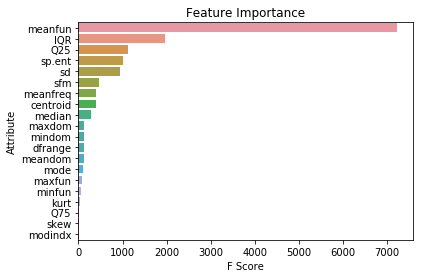

In [18]:
k1=sns.barplot(x=k['F Score'],y=k['Attribute'])
k1.set_title('Feature Importance')